# Questions 3: Are waterfront properties more expensive?

In [91]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import numpy as np

In [92]:
df = pd.read_csv('../data/datawithnewcols.csv',index_col=0)

In [93]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,69,29,1,1,0,12.613856,15.150174,12.613856,30.859494
1,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,87,87,0,0,1,16.333282,14.375822,14.375822,33.112379
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,55,55,1,1,0,10.617501,17.522706,10.617501,10.988905
3,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,33,33,0,0,1,21.759524,11.683886,11.683886,27.230991
4,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,101930,19,19,1,1,0,25.295727,15.508940,15.508940,32.449837


In [94]:
dfwaterfront = df.loc[df['waterfront']==1]

In [95]:
meanwaterfront = dfwaterfront['price'].mean()
medianwaterfront = dfwaterfront['price'].median()

In [96]:
print(f" The mean price of a waterfront property is: {meanwaterfront}")
print(f" The median price of a waterfront property is: {medianwaterfront}")


 The mean price of a waterfront property is: 1717214.7260273972
 The median price of a waterfront property is: 1510000.0


In [97]:
dfnowaterfront = df.loc[df['waterfront']==0]

In [98]:
meannowaterfront = dfnowaterfront['price'].mean()
mediannowaterfront = dfnowaterfront['price'].median()

In [99]:
print(f" The mean price of a property with no waterfront is: {meannowaterfront}")
print(f" The median price of a property with no waterfront is: {mediannowaterfront}")


 The mean price of a property with no waterfront is: 532641.9866841416
 The median price of a property with no waterfront is: 450000.0


In [100]:
waterfront_percentage =round(len(dfwaterfront)/len(dfnowaterfront)*100,2)

In [101]:
print(f" {waterfront_percentage}% of properties in the dataset are on the waterfront")

 0.77% of properties in the dataset are on the waterfront


In [102]:
print(dfwaterfront['price'].median())

1510000.0


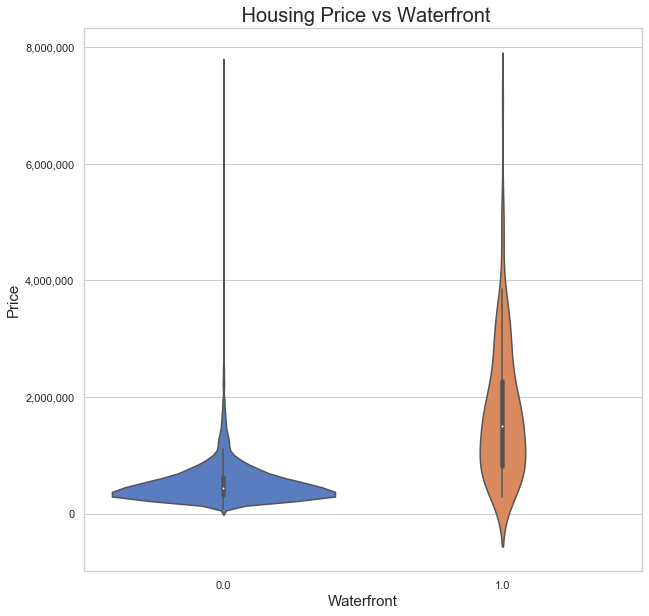

In [103]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x = 'waterfront', y = 'price', data=df)
ax.set_title(' Housing Price vs Waterfront', fontsize=20)
ax.set_xlabel('Waterfront', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Without Outliers - 3 standard deviations

In [104]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price']

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [105]:
df.drop(all_indices, axis=0,inplace = True)

In [106]:
df.reset_index(inplace=True)

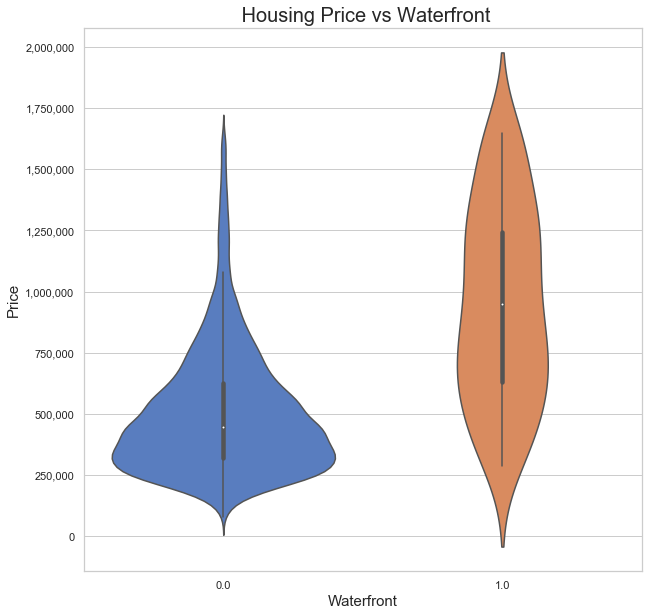

In [107]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x = 'waterfront', y = 'price', data=df)
ax.set_title(' Housing Price vs Waterfront', fontsize=20)
ax.set_xlabel('Waterfront', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Conclusion

Yes, it is clear waterfront properties are more expensive

The mean and median price of a waterfront home is  USD1.7m and USD 1.5m respectively.

The mean and median price of a home that is not on the waterfront is USD 532k and USD450k respectively. 

That is a difference of USD 1m between the average home prices of a waterfront and no waterfront property

This massive disparity in price is most likely down to how little waterfrotn proeprties there are, with less than 1% 
of the homes in the dataset having one
